### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [357]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [358]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head

<bound method NDFrame.head of       gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     educ

In [359]:
# Any missing values?
if reviews.isnull().values.any():
    print("There are missing values in the dataframe.")
else:
    print("There are no missing values in the dataframe.")

There are no missing values in the dataframe.


In [360]:
# Explore the data.
reviews.info

<bound method DataFrame.info of       gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     ed

In [361]:
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [362]:
# Descriptive statistics.
reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

## 2. Drop columns

In [363]:
# Drop unnecessary columns.
df2 = reviews.drop(['language','platform'], axis=1)

# View DataFrame.
df2.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [364]:
# Rename the column headers.
df3 = df2.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'})

# View column names.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [365]:
# Create a CSV file as output and Import new CSV file with Pandas.
df3.to_csv('turtle_reviews_cleaned_version.csv', index=False)

In [366]:
# Import new CSV file with Pandas.
turtle_reviews = pd.read_csv('turtle_reviews_cleaned_version.csv')

# View the DataFrame
turtle_reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [367]:
# View metadata of the DataFrame.
turtle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 5. Linear regression

### 5a) spending vs loyalty

In [368]:
# Independent variable.
x = turtle_reviews['spending_score']

# Dependent variable.
y = turtle_reviews['loyalty_points']

# add a constant term to the independent variables
X = sm.add_constant(x)

# OLS model and summary.
# fit the model
model = sm.OLS(y, X).fit()

# print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 11 May 2023   Prob (F-statistic):          2.92e-263
Time:                        12:46:56   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -75.0527     45.931     -1.

In [369]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = turtle_reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 11 May 2023   Prob (F-statistic):          2.92e-263
Time:                        12:46:56   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [370]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())


Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [371]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_s = -75.052663 + 33.061693 * x

# View the output.
y_pred_s

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

In [372]:
# Set the X coefficient and the constant to generate the regression table.
X = sm.add_constant(reviews['spending_score'])
y = reviews['loyalty_points']

model = sm.OLS(y, X).fit()

# View the output.
print(model.summary())

KeyError: 'spending_score'

In [373]:
# Independent variable.
x = reviews['spending_score']

# Dependent variable.
y = reviews['loyalty_points']

# add a constant term to the independent variables
X = sm.add_constant(x)

# OLS model and summary.
# fit the model
model = sm.OLS(y, X).fit()

# get the coefficients of the regression equation
coefficients = model.params
print('Coefficients: \n', coefficients)

KeyError: 'spending_score'

In [ ]:
# Plot the graph with a regression line.
# Independent variable.
x = reviews['spending_score']

# Dependent variable.
y = reviews['loyalty_points']

# add a constant term to the independent variables
X = sm.add_constant(x)

# OLS model and summary.
# fit the model
model = sm.OLS(y, X).fit()

# plot the scatterplot with regression line
sns.regplot(x=x, y=y)
plt.show()

### 5b) renumeration vs loyalty

In [ ]:
# Independent variable.
x = reviews['remuneration']

# Dependent variable.
y = reviews['loyalty_points']

X = sm.add_constant(x)


# OLS model and summary.
model = sm.OLS(y, X).fit()
print(model.summary())

In [ ]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

In [ ]:
# Set the X coefficient and the constant to generate the regression table.
X = sm.add_constant(reviews['remuneration'])
y = reviews['loyalty_points']

model = sm.OLS(y, X).fit()

# View the output.
print(model.summary())


In [ ]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred_r = -65.686513 + 34.187825 * x

# View the output.
y_pred_r

In [ ]:
# OLS model and summary.
# fit the model
model = sm.OLS(y, X).fit()

# get the coefficients of the regression equation
coefficients = model.params
print('Coefficients: \n', coefficients)

In [ ]:
# Plot the graph with a regression line.
# Independent variable.
x = reviews['remuneration']

# Dependent variable.
y = reviews['loyalty_points']

# add a constant term to the independent variables
X = sm.add_constant(x)

# OLS model and summary.
# fit the model
model = sm.OLS(y, X).fit()

# plot the scatterplot with regression line
sns.regplot(x=x, y=y)
plt.show()

### 5c) age vs loyalty

In [ ]:
# Independent variable.
x = reviews['age']

# Dependent variable.
y = reviews['loyalty_points']

X = sm.add_constant(x)


# OLS model and summary.
model = sm.OLS(y, X).fit()
print(model.summary())

In [ ]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())


In [ ]:
# Set the X coefficient and the constant to generate the regression table.
X = sm.add_constant(reviews['remuneration'])
y = reviews['loyalty_points']

model = sm.OLS(y, X).fit()

# View the output.
print(model.summary())

In [ ]:
# OLS model and summary.
# fit the model
model = sm.OLS(y, X).fit()

# get the coefficients of the regression equation
coefficients = model.params
print('Coefficients: \n', coefficients)

In [ ]:
# Plot the graph with a regression line.
# Independent variable.
x = reviews['age']

# Dependent variable.
y = reviews['loyalty_points']

# add a constant term to the independent variables
X = sm.add_constant(x)

# OLS model and summary.
# fit the model
model = sm.OLS(y, X).fit()

# plot the scatterplot with regression line
sns.regplot(x=x, y=y)
plt.show()

## 6. Observations and insights

***Your observations here...***






Spending vs Loyalty - Loyalty points are most consistent at the lower end of the spending scores, for exmaple: Between spending scores of 0 to 60, there are tight clusters of data that don't fluctuate very much and are tightly bunched together, with the highest amount of loyalty points being around the 2500 mark. However, once the spending score goes past 60 the plot becomes more sporadic and spaced out. For example, at the spending scores of around 85 we see the highest plot in loyalty points at almost 7000. But we also see quite a few clusters of plots at the lower end of the loyalty points, from the 2000 mark and below. These trends are further stressed when you analyse the regression line, for example: between spending score of 0 - 60, there are many plots and clusters that are closer to the line with less space between them and indicating more consistency. However, past this point there are maybe 3 or 4 plots that touch the line with a large variance in the clusters and a marked redution in consistency of the plots.
An explanation of these trends could be because new shoppers looking to improve their loyalty points  after joining would be more likely to spend more at first but, as the novelty wears off and time goes on, many customers make the decison between continuing/ upping their spending because they are happy with the service and product or they decide to lower thier spending as thier initial excitement wears off and they feel unhappy with the service.

Remuneration vs Loyalty - The patterns with this graph are similar to the trends of the spending vs loyalty. From 0 to around the 50 mark on the x axis, the points are very close together and the patterns are very consistent. However, passed this mark the points seem to become spread out with only 1 point on the regression line. Points passed the 60 mark are also more extreme with around 7 points passed the 6000 loyalty points mark and 1 at the 7000 loyalty points. Some points are also close to the 0 loylty points mark with quite a few clusters below the 1000 mark the further passed the 60 remuneration mark you go. 
These results indicate that if remuneration is low (below the 50 mark) then loyalty poiints will remain consistent, tight and on very close to both sides of the regression line. This could indicate the norm which is that the average customer that requires remuneration would only require it for a small amount (below 50) and all whilst only having a relatively small amount of loyalty points (below 2000), either because they are new/ recent customers or because they dont spend much. This changes once you go past the 50 mark for remuneration: as customers start to spend more thier loyalty points go up but so does the likelihood of remuneration. This doesnt explain why the level of remuneration for the plots below the regression line (from 60 onwards) are also very spread out. A suggested answer for this could be because the customer could lose loyalty points when they carry out a remuneration and if its a new customer then this could lead to a lower level of loyalty points. 

Age vs Loyalty - The plots on this graph have a different pattern to the other 2 graphs. There is a heavy amount of plots below the 2000 loyalty poinnts mark with large clusters between each age label. The most focused clusters are between the 30 and 50 age mark and a large majority of the plots are below the regression line. However, once you reach 2500 loyalty points and go above the regression line, the plots become alot fewer and further between with only 1 or 2 main clusters of plots and alot of lone plots. The highest plot is at the age of around 45 and is just below 7000 loyalty points. The general observation here is that the vast majority and therefore, the average person, seems to have below 2000 loyalty points. Although, between the age of 30 and 40 does have the most plots above 2500 loyalty points, it is uncommon for anyone to have more than 25000. It is more likely for a person between the ages of 30 and 40 to have ove this amount but once you reach the age of 60 this only occurs 8 times.
An explanation for these trends could be that shoppers between the ages of 30 and 40 are more likely to have families requiring them to spend more money and build up more loyalty points. And those on the extreme ends of the age line, such as those between the ages of 20 to 30 and 60 to 70 less likely to be in this situation. 

Overall, based on the plots, there seems to be a positive correlation between customer loyalty and spending and between customer loyalty and remuneration. However, there is no correlation between age and loyalty.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [ ]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews_cleaned_version.csv')

# View DataFrame.
df2

In [ ]:
df2 = reviews[['remuneration (k£)', 'spending_score (1-100)']]


# View DataFrame.
df2

In [ ]:
# Explore the data.
df2.info

In [ ]:
# Descriptive statistics.
df2.describe()

In [ ]:
df2.dtypes

## 2. Plot

In [ ]:
print(df2.columns)

In [ ]:
# Create a scatterplot with Seaborn.
sns.scatterplot(data=df2, x='spending_score', y='remuneration')

In [ ]:
# Create a pairplot with Seaborn.
sns.pairplot(df2,
             vars=df2,
             diag_kind= 'kde')

## 3. Elbow and silhoutte methods

In [ ]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x[:, np.newaxis])
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

In [ ]:
# Determine the number of clusters using the silhouette method 
sil = []
kmax = 10
kmeans_s = None  

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(x.values.reshape(-1, 1))  # Convert x to a NumPy array and reshape it
    labels = kmeans.labels_
    sil.append(silhouette_score(x.values.reshape(-1, 1),  # Convert x to a NumPy array and reshape it
                                labels,
                                metric='euclidean'))
    kmeans_s = kmeans  # Update kmeans_s inside the loop

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()


## 4. Evaluate k-means model at different values of *k*

Im going to try multiple k values such as k = 4, k = 5 and k = 6.

In [ ]:
# k=4
kmeans = KMeans(n_clusters = 3,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [ ]:
# k=4
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [ ]:
# k=5
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [409]:
# Changing the k value in the elbow method to 1,20
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=
                    init='k-means++'
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x[:, np.newaxis])
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 21),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")


SyntaxError: invalid syntax (626750302.py, line 6)

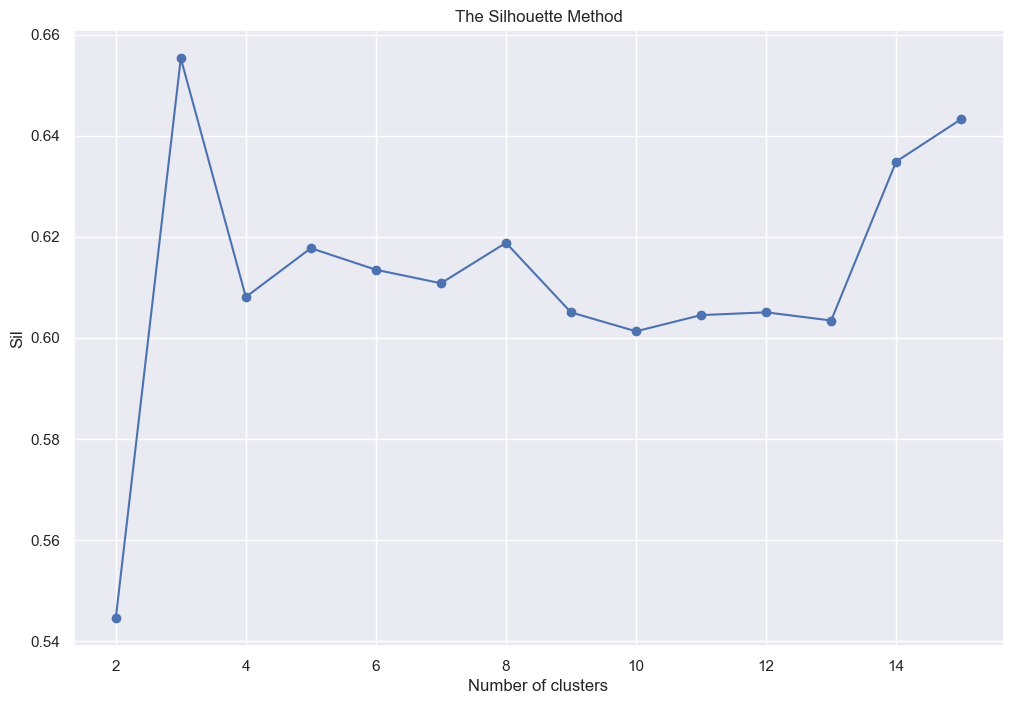

In [411]:
# Changing the k value in the silhouette method from 10 clusters to 15 clusters
# Determine the number of clusters using the silhouette method 
sil = []
kmax = 15
kmeans_s = None  

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(x.values.reshape(-1, 1))  # Convert x to a NumPy array and reshape it
    labels = kmeans.labels_
    sil.append(silhouette_score(x.values.reshape(-1, 1),  # Convert x to a NumPy array and reshape it
                                labels,
                                metric='euclidean'))
    kmeans_s = kmeans  # Update kmeans_s inside the loop

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 5. Fit final model and justify your choice

In [ ]:
# Apply the final model.
# Choose k=5
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [ ]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

In [ ]:
# Apply the final model
kmeans = KMeans(n_clusters = 3, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x.values.reshape(-1, 1))

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters.reshape(-1, 1)

x['K-Means Predicted'] = clusters

In [ ]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

## 6. Plot and interpret the clusters

In [374]:
# Visualising the clusters.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y='spending_score',
                data=df2 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

# View the DataFrame.
df2.head()

ValueError: Could not interpret value `remuneration` for parameter `x`

In [375]:
# Visualising the clusters.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y='spending_score',
                data=df2 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

# View the DataFrame.
df2.head()


ValueError: Could not interpret value `remuneration` for parameter `x`

## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [ ]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [376]:
# Load the CSV file(s) as df3.
df3 = pd.read_csv('turtle_reviews.csv')

# View DataFrame.
df3

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [377]:
# Keep necessary columns. Drop unnecessary columns.
df32 = df3[['review', 'summary']]

# View DataFrame.
df32.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [378]:
# Determine if there are any missing values.
df32.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [379]:
# Review: Change all to lower case and join with a space.
df32.review = df32.review.apply(lambda x: " ".join(x.lower() for x in x.split()))

In [380]:
# Summary: Change all to lower case and join with a space.
df32.summary = df32.summary.apply(lambda x: " ".join(x.lower() for x in x.split()))

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [381]:
# Replace all the punctuations in review column.
df32.review = df3a.review.str.replace('[^\w\s]','')

# View output.
df32.review

0       When it comes to a DMs screen the space on the...
1       An Open Letter to GaleForce9\n\nYour unpainted...
2       Nice art nice printing  Why two panels are fil...
3       Amazing buy Bought it as a gift for our new dm...
4       As my review of GF9s previous screens these we...
                              ...                        
1995    The perfect word game for mixed ages with Mom ...
1996    Great game  Did not think I would like it when...
1997            Great game for all\nKeeps the mind nimble
1998                                             fun game
1999    This game is fun A lot like scrabble without a...
Name: review, Length: 2000, dtype: object

In [382]:
# Replace all the puncuations in summary column.
df32.summary = df32.summary.str.replace('[^\w\s]','')

# View output.
df32.summary

0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995        the perfect word game for mixed ages with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

### 2c) Drop duplicates in both columns

In [383]:
# Drop duplicates in both columns.
df32.review.duplicated().sum()
df33 = df32.drop_duplicates().reset_index(drop=True)

# View DataFrame.
df33.head()

,review,summary
0,When it comes to a DMs screen the space on the...,the fact that 50 of this space is wasted on ar...
1,An Open Letter to GaleForce9\n\nYour unpainted...,another worthless dungeon masters screen from ...
2,Nice art nice printing Why two panels are fil...,pretty but also pretty useless
3,Amazing buy Bought it as a gift for our new dm...,five stars
4,As my review of GF9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

In [384]:
# Create new DataFrame (copy DataFrame).
df34 = df33

# View DataFrame.
df34


,review,summary
0,When it comes to a DMs screen the space on the...,the fact that 50 of this space is wasted on ar...
1,An Open Letter to GaleForce9\n\nYour unpainted...,another worthless dungeon masters screen from ...
2,Nice art nice printing Why two panels are fil...,pretty but also pretty useless
3,Amazing buy Bought it as a gift for our new dm...,five stars
4,As my review of GF9s previous screens these we...,money trap
...,...,...
1966,The perfect word game for mixed ages with Mom ...,the perfect word game for mixed ages with mom
1967,Great game Did not think I would like it when...,super fun
1968,Great game for all\nKeeps the mind nimble,great game
1969,fun game,four stars


In [385]:
# Apply tokenisation to both columns.
df34['review_tokens'] = df34['review'].apply(word_tokenize)
df34['summary_tokens'] = df34['summary'].apply(word_tokenize)

# View DataFrame.
df34.head()

,review,summary,review_tokens,summary_tokens
0,When it comes to a DMs screen the space on the...,the fact that 50 of this space is wasted on ar...,"[When, it, comes, to, a, DMs, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,An Open Letter to GaleForce9\n\nYour unpainted...,another worthless dungeon masters screen from ...,"[An, Open, Letter, to, GaleForce9, Your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,Nice art nice printing Why two panels are fil...,pretty but also pretty useless,"[Nice, art, nice, printing, Why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,Amazing buy Bought it as a gift for our new dm...,five stars,"[Amazing, buy, Bought, it, as, a, gift, for, o...","[five, stars]"
4,As my review of GF9s previous screens these we...,money trap,"[As, my, review, of, GF9s, previous, screens, ...","[money, trap]"


In [386]:
# Installing WordCloud
!pip install WordCloud
from wordcloud import WordCloud 

# Review: Create a word cloud.
# String all the comments together in a single variable.
# Create an empty string variable.

all_review = ''
for i in range(df34.review.shape[0]):
    # Add each comment.
    all_review = all_review + df34.review[i]

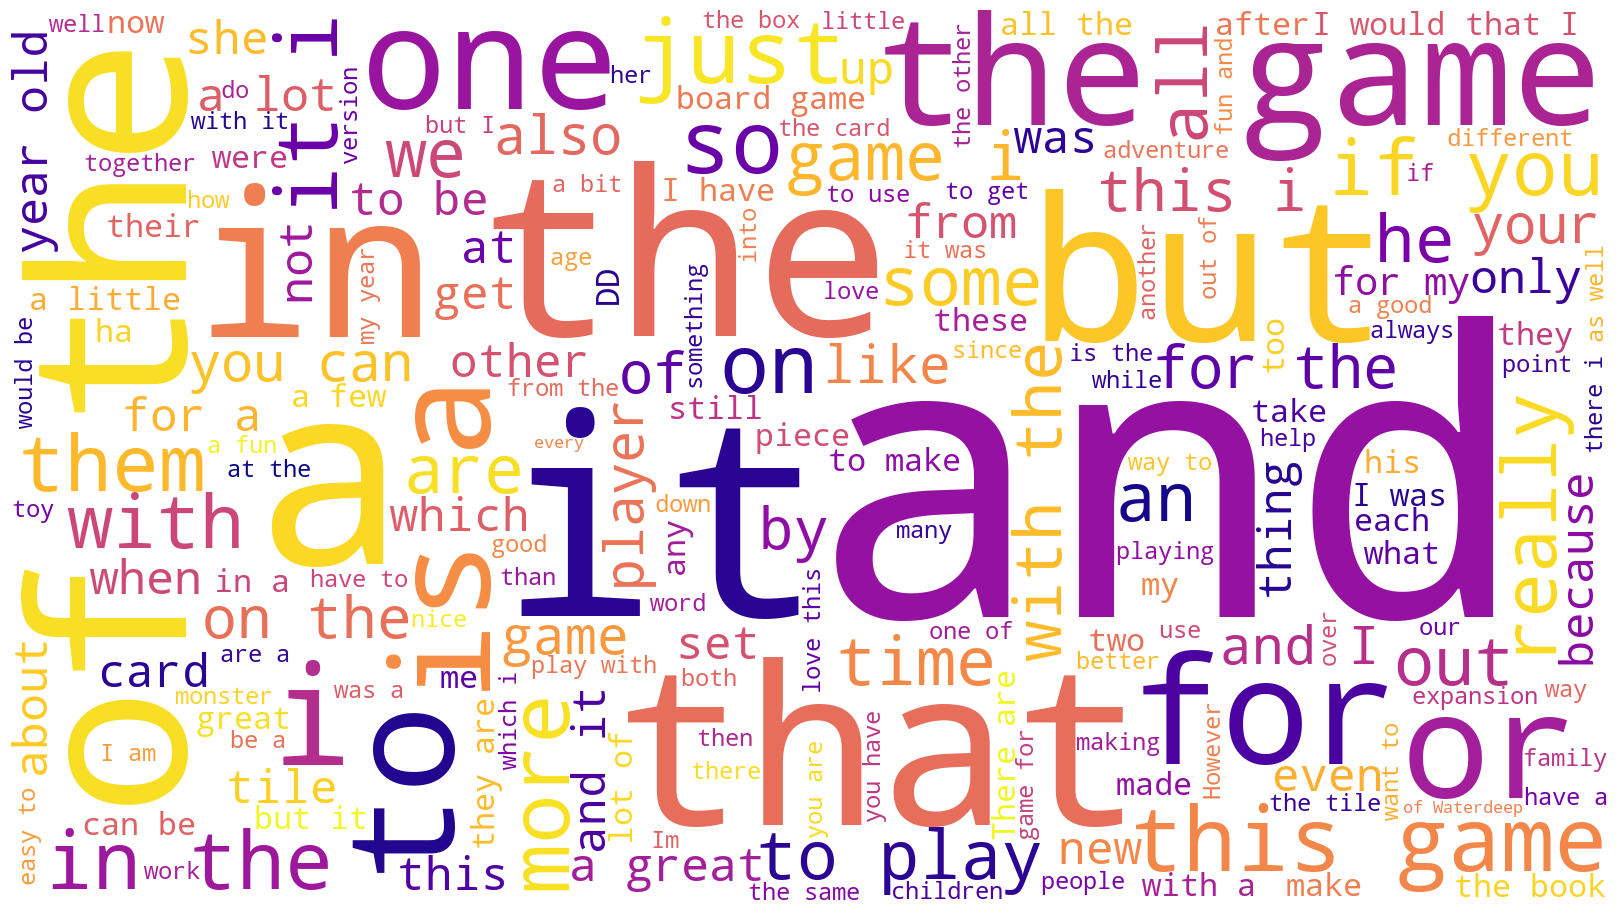

In [387]:
# Review: Plot the WordCloud image.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_review)

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
# Summary: Create a word cloud.


In [ ]:
# Summary: Plot the WordCloud image.


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [388]:
# Determine the frequency distribution.
review_tokens = []
for i in range(df34.review.shape[0]):
    # Add each token to the list.
    review_tokens = review_tokens + df34['review_tokens'][i]
fdist_review = FreqDist(review_tokens)

summary_tokens = []
for i in range(df34.review.shape[0]):
    # Add each token to the list.
    summary_tokens = summary_tokens + df34['summary_tokens'][i]
fdist_summary = FreqDist(summary_tokens)

fdist_review

FreqDist({'the': 4616, 'and': 3164, 'to': 3144, 'a': 3040, 'of': 2471, 'I': 2040, 'is': 1768, 'it': 1758, 'game': 1628, 'for': 1508, ...})

In [389]:
# View the frequency distribution.
fdist1 = FreqDist(df34)

# Preview the data.
fdist1

FreqDist({'review': 1, 'summary': 1, 'review_tokens': 1, 'summary_tokens': 1})

In [390]:
fdist_summary

FreqDist({'stars': 437, 'five': 352, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [391]:
# Delete all the alpanum.
review_tokens2 = [word for word in review_tokens if word.isalpha()]
summary_tokens2 = [word for word in summary_tokens if word.isalpha()]
review_tokens2

['When',
 'it',
 'comes',
 'to',
 'a',
 'DMs',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'The',
 'fact',
 'that',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'The',
 'only',
 'reason',
 'that',
 'I',
 'gave',
 'it',
 'stars',
 'and',
 'not',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'Other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'An',
 'Open',
 'Letter',
 'to',
 'Your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'Your',
 'spell',
 'cards',
 'are',
 'great',
 'Your',
 'board',
 'games',
 'are',
 'meh',
 'Your',
 'DM',
 'screens',
 'however',
 'are',
 'freaking',
 'terrible',
 'Im',
 'still',
 'waiti

In [392]:
# Remove all the stopwords
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
review_tokens3 = [word for word in review_tokens2 if word.lower() not in english_stopwords]
summary_tokens3 = [word for word in summary_tokens2 if word.lower() not in english_stopwords]

# Define an empty string variable.
all_review2 = ''
all_summary2 = ''

for value in review_tokens3:
    # Add each filtered token word to the string.
    all_review2 = all_review2 + value + ' '
for value in summary_tokens3:
    # Add each filtered token word to the string.
    all_summary2 = all_summary2 + value + ' '     

### 4c) Create wordcloud without stopwords

In [393]:
# Create a wordcloud without stop words.
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens2:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\44753\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'tokens' is not defined

In [394]:
# The above code written for me, presented an error code whereby the name 'tokens' is not defined
# The following is an attempt to fix that by defning the 'tokens' variable as a list of tokens and replacing the for loop with a loop over the filtered list 'tokens2'

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define a sample input string.
input_string = "This is a sample sentence with some stopwords like 'the', 'and', and 'a'."

# Tokenize the input string.
tokens = input_string.split()

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens2:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '
    
print(tokens2_string)  # Output: "sample sentence stopwords like ' , ', ."

sample sentence stopwords like 'the', 'and', 'a'. 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\44753\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


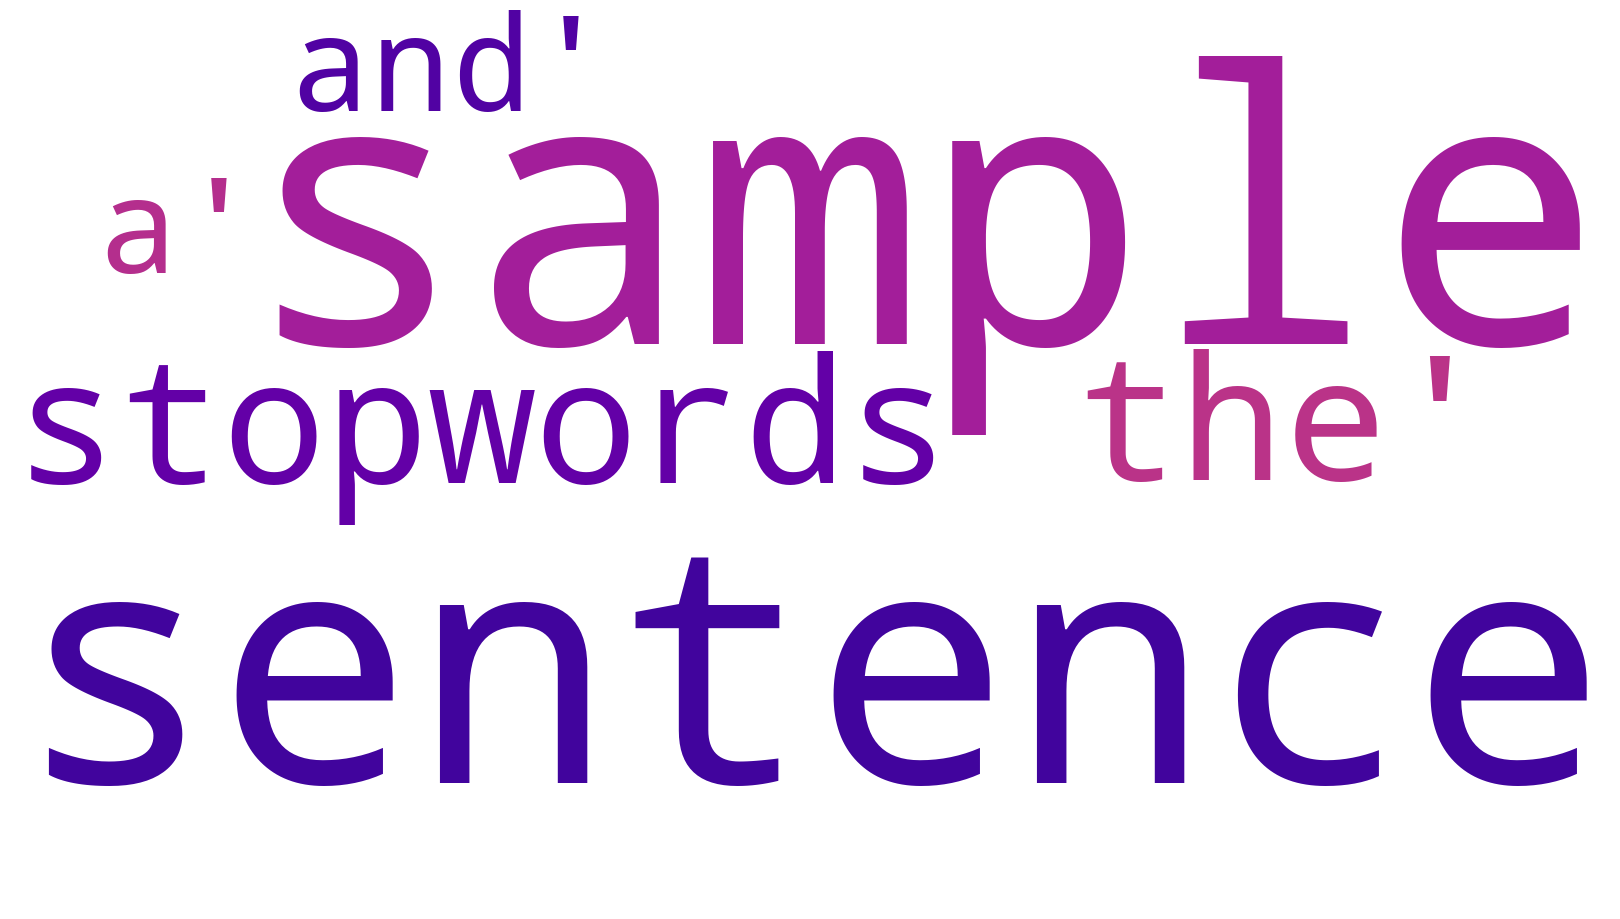

In [398]:
# Plot the wordcloud image.
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [396]:
# Determine the 15 most common words.
counts_review = pd.DataFrame(Counter(review_tokens3).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review

,Frequency
Word,
game,1628
play,493
fun,489
one,481
like,404
great,374
get,312
cards,289
really,289


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [401]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [402]:
# Determine polarity of both columns. 
score_review = [generate_polarity(entry) for entry in df34.review]
score_summary = [generate_polarity(entry) for entry in df34.summary]

# View output.
score_review


[-0.03611111111111111,
 0.03595238095238096,
 0.11664023960535587,
 0.5787878787878787,
 -0.31666666666666665,
 0.0,
 0.6599999999999999,
 1.0,
 0.37222222222222223,
 0.14553713830029621,
 0.2,
 0.0,
 0.06999999999999999,
 -0.040909090909090874,
 0.04000000000000001,
 -0.0050000000000000044,
 0.1772879464285714,
 0.290952380952381,
 0.25000000000000006,
 0.017500000000000022,
 -0.25,
 0.05,
 0.1621794871794872,
 0.12604166666666666,
 0.024999999999999994,
 0.42666666666666664,
 0.6833333333333332,
 0.85,
 0.5416666666666667,
 0.4000000000000001,
 0.13095238095238093,
 0.4388888888888889,
 0.75,
 0.7166666666666667,
 0.47000000000000003,
 0.6125,
 0.8,
 0.65,
 0.36129629629629634,
 0.0,
 0.30476190476190473,
 0.5833333333333334,
 0.64,
 0.5,
 0.8,
 0.75,
 0.7,
 0.4,
 0.5,
 0.35,
 0.3,
 0.4883333333333334,
 0.35,
 0.5499999999999999,
 -0.025000000000000022,
 0.8,
 0.2702922077922078,
 0.29375,
 0.0708333333333333,
 0.12,
 0.3185714285714286,
 0.08472222222222223,
 0.1025,
 0.111287477954

Text(0.5, 1.0, 'Histogram of Sentiment Scores for Reviews')

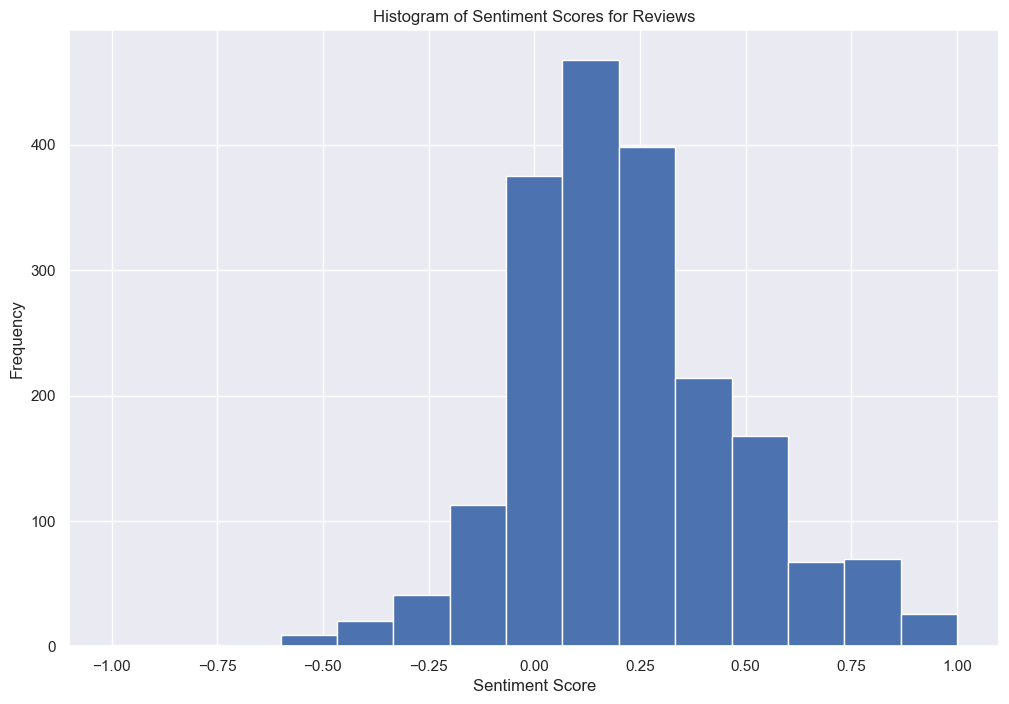

In [403]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score
plt.hist(score_review, bins=15)

# add axis labels and a title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores for Reviews')


Text(0.5, 1.0, 'Histogram of Sentiment Scores for Summaries')

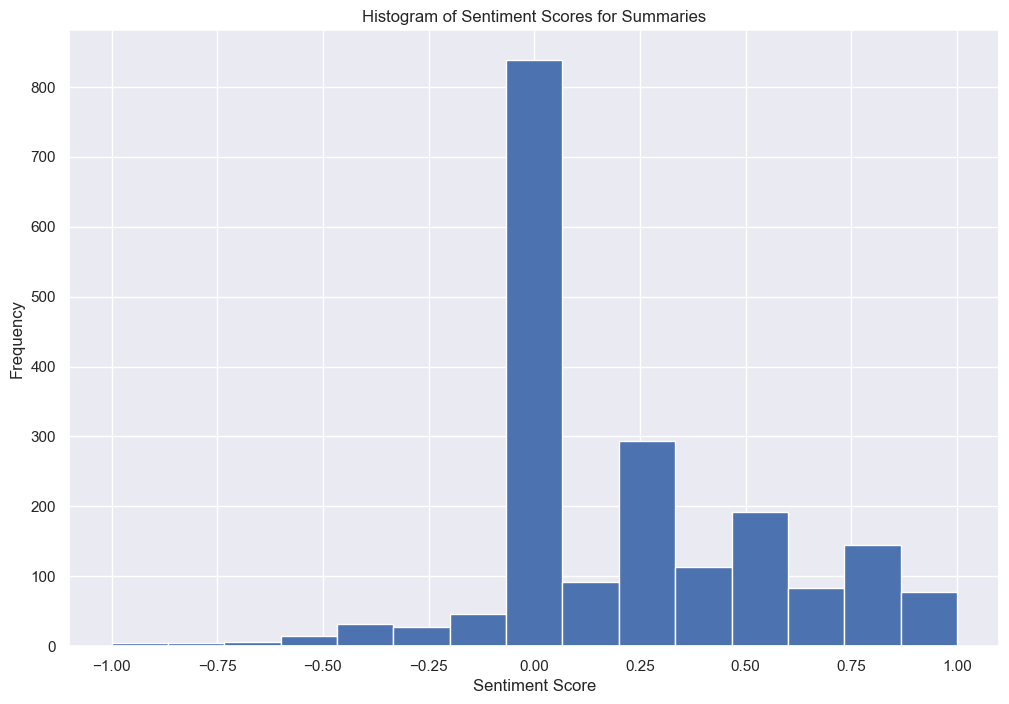

In [404]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score
plt.hist(score_summary, bins=15)

# add axis labels and a title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores for Summaries')


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [405]:
# Top 20 negative reviews.
review2 = pd.DataFrame({'Review': df34.review, 'Sentiment Score': score_review})
review3 = review2.sort_values('Sentiment Score')

# View output.
review_pos = review3.head(20)
review_pos


,Review,Sentiment Score
208,BOOO UNLES YOU ARE PATIENT KNOW HOW TO MEASUR...,-1.000000
182,Incomplete kit Very disappointing,-0.780000
1778,Im sorry I just find this product to be boring...,-0.583333
363,One of my staff will be using this game soon s...,-0.550000
230,I found the directions difficult,-0.500000
117,I bought this as a Christmas gift for my grand...,-0.500000
301,Difficult,-0.500000
1506,Expensive for what you get,-0.500000
290,Instructions are complicated to follow,-0.500000
227,this was a gift for my daughter I found it di...,-0.500000


In [406]:
# Top 20 negative summaries.
summary2 = pd.DataFrame({'Review': df34.summary, 'Sentiment Score': score_summary})
summary3 = summary2.sort_values('Sentiment Score')

# View output.
summary_neg = summary3.head(20)
summary_neg


,Review,Sentiment Score
822,boring,-1.000000
21,the worst value ive ever seen,-1.000000
208,boring unless you are a craft person which i am,-1.000000
1152,before this i hated running any rpg campaign d...,-0.900000
1,another worthless dungeon masters screen from ...,-0.800000
144,disappointed,-0.750000
625,disappointed,-0.750000
787,disappointed,-0.750000
1596,disappointed,-0.750000
362,promotes anger instead of teaching calming met...,-0.700000


In [407]:
# Top 20 positive reviews.
review_pos = review3.tail(20)

# View output.
review_pos


,Review,Sentiment Score
926,Awesome,1.0
1385,One of the best board games I played in along ...,1.0
165,Awesome book,1.0
1689,Awesome toy,1.0
615,Wonderful for my grandson to learn the resurre...,1.0
194,Awesome gift,1.0
1585,this was perfect to go with the 7 bean bags I...,1.0
1123,awesome set,1.0
1694,It is the best thing to play with and also min...,1.0
1938,Perfect for tutoring my grandson in spelling,1.0


In [408]:
# Top 20 positive summaries.
summary_pos = review3.tail(20)

# View output.
summary_pos


,Review,Sentiment Score
926,Awesome,1.0
1385,One of the best board games I played in along ...,1.0
165,Awesome book,1.0
1689,Awesome toy,1.0
615,Wonderful for my grandson to learn the resurre...,1.0
194,Awesome gift,1.0
1585,this was perfect to go with the 7 bean bags I...,1.0
1123,awesome set,1.0
1694,It is the best thing to play with and also min...,1.0
1938,Perfect for tutoring my grandson in spelling,1.0


## 7. Discuss: Insights and observations

***Your observations here...***

From the Seaborn scatterplot and pair plot I can see that most of the points are concentrated in the middle. For example, when comparing spending score to remuneration, the highest concentration is in the middle of the graph where spending score is between 40 and 60 and remuneration is just below 40 and just below 60. The rest of the points are scattered more into each corner of the graph but they lack the same concentration as those points found in the middle. 

When you look at the pair plot for the pattern of spending score you see that the graph has 2 low peaks on either side with one high peak in the middle. As the spending score goes up the remuneration goes up as well, with highest spending scores, of around 100, occur when the remuneration is at 50. 

Looking at the graph from the elbow method I have observed that the SS distance is higher the smaller the number of clusters. The highest point is at 1 cluster with the SS distance at 1.4 but, as the number of clusters goes up the SS distance drops. For example, between 2 and 3 clusters the SS distance goes from just above 0.4 to just below 0.2. When the number of clusters reaches 4 the SS distance remains steadily low at around the 0.2 mark all the way until the end of the graph when the number of clusters is at 10. 

The elbow method will help me find the optimal k value and this can be found once the graph starts to look like an elbow. In this case it is around the 3 mark where the graph actually bends into a straight line. With this in mind, the optimal k value should be 3. And, using the silhouette method it’s clear that the Sil changes drastically when the number of clusters reaches 3 which indicates that the optimal k value should be 3. For this reason I set the number of clusters to 3 when applying the final model.

After making the word cloud I noticed that because the frequency of stop words was so high it was cancelling out the more important words for the analysis that the word cloud provided. 

The histogram of sentiment scores for Reviews shows that there is more positive sentiment than negative sentiment and the highest reading between the sentiment scores of 0.00 and 0.25. There are no readings past the -0.50 mark but there are around 20 readings just before the 1.00 mark. Overall, the extremes of the reading are low with higher frequency on the positive end but, the middle of the graph between the points of 0.00 and 0.25 bearing the most readings with the highest reading containing almost 500 in frequency. 

The histogram of sentiment scores for Summary shows that there is alot more positivity than negativity with very faint readings past the -0.50 mark for negativity but very high readings of atleast 100 in frequncy up to the 1.00 mark for sentiment score. The highest reading which stands noticeably taller than any other reading is at the 0.00 mark for sentiment scores, at around the 850 mark. This could be because the sentiment analyser is not sure what the sentiment of alot of the Summaries are and therefore just puts them into the neutral zone at 0.00 even though there may be positive or negative sentiments contained within them.

# 